# League of Legends Professional Games Dataset 2015-2017
# EDA
# Michael Phillips

## Introduction

League of Legends (LoL) is a team-based, competitive online computer game. It is, by most accounts the most popular video game currently in active development. On September 13, 2016 the game’s developer, Riot Games, announced that their monthly active users topped 100 million. [Source](https://www.riftherald.com/2016/9/13/12865314/monthly-lol-players-2016-active-worldwide) 

Accompanying the main game, Riot sponsors a professional league made up of teams from around the world. The 2016 LoL World Championships were broadcast to online streaming platforms in 18 languages, with peak concurrent viewership (PCU) of 14.7 million people. Over 43 million unique visitors watched broadcasts during the tournament. The final prize pool for the Championship came out to 6.7 million dollars, split among the participating teams. [Source](http://www.lolesports.com/en_US/articles/2016-league-legends-world-championship-numbers)

Despite these metrics, LoL remains almost invisible to outsiders. The game is a phenomena the likes of which is exceedingly rare, but crucially, is nearly impenetrable to the uninitiated. It is full of seemingly arcane rules and obscure wrinkles – not least of which are the ~140 different characters (also known as Champions) available to each player, which all have unique move-sets and abilities.  

It takes considerable effort to understand the game, but once you do there is something rather amazing there. As someone who grew up playing pick-up basketball, LoL scratches a very similar itch. Both are 5-vs-5 competitive games that vary based on strategy and the individual participants. 

I think there is a lot of room in the LoL community for in-depth data analysis, and am curious to see how the professional league evolves over the next several months and years. Riot has announced preliminary plans to franchise the team slots in their league during 2018, opening the door to increased sponsorship/revenues. Additionally, the broadcast revenue for the league will be split amongst the participating teams, much like the NFL and NBA currently do. These broadcast rights were recently sold to BAMTech, the streaming tech company owned by MLB and Disney, for a minimum of $300 million through 2023. [Source](https://www.engadget.com/2016/12/16/bamtech-riot-games-league-of-legends-streaming-deal-wsj/)

The data being examined here contains a wide variety of measurements from LoL Professional games spanning late 2014 to mid-2017. I will be hoping to gain a better understanding of what trends are present in the data, and to find potential areas of interest for the machine learning portion of this project.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
pk_df = pd.read_csv('player_kda.csv', index_col=0)
tk_df = pd.read_csv('team_kda.csv', index_col=0)
obj_df = pd.read_csv('object_sums.csv', index_col=0)
gen_df = pd.read_csv('merged_df.csv', index_col=0)
gm_df = pd.read_csv('gold_diff_merged.csv', index_col=0)
gt_df = pd.read_csv('gold_df_merged.csv', index_col=0)

## Total Wins, Losses, and Win Percentages

The most basic metrics include wins, losses and win percentages across the league. Let’s see which teams have consistently performed well.


In [3]:
gen_df.head()

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,top_player,top_champ,jungle_player,jungle_champ,mid_player,mid_champ,adc_player,adc_champ,support_player,support_champ,ban_1,ban_2,ban_3,ban_4,ban_5
0,001a1f289e3bab22,LCK,Summer_Season,2015,ANC,blue,0,38,ikssu,Hecarim,lira,Gragas,Mickey,Vladimir,Sangyoon,Sivir,SnowFlower,Morgana,Azir,Shyvana,Jayce,NaN,NaN
1,001a1f289e3bab22,LCK,Summer_Season,2015,CJE,red,1,38,Shy,Rumble,Ambition,Sejuani,Coco,Cassiopeia,Space,Jinx,Thresh,MadLife,Zed,Gnar,Kalista,NaN,NaN
2,001f50c8547e2e73,Season_World_Championship,International,2014,EDG,blue,1,37,Koro1,Maokai,Clearlove,Rengar,U,Zed,NaMei,Twitch,Fzzf,Thresh,Fizz,LeeSin,TwistedFate,NaN,NaN
3,001f50c8547e2e73,Season_World_Championship,International,2014,AHQ,red,0,37,Prydz,Nidalee,NAZ,Khazix,westdoor,Talon,GarnetDevil,Lucian,Blitzcrank,GreenTea,Ryze,Zilean,Alistar,NaN,NaN
4,002f613ae09ad421,LMS,Spring_Season,2016,TPA,blue,1,30,Morning,Trundle,REFRA1N,RekSai,FoFo,Lissandra,BeBe,Lucian,Jay,Alistar,Corki,Gangplank,TahmKench,NaN,NaN


In [4]:
results_df = pd.pivot_table(gen_df, index=['team_name'], aggfunc=np.sum)
results_df = results_df.reset_index()
results_df.drop(['game_length', 'year'], inplace=True, axis=1)
results_df = results_df.rename(columns = {'result':'wins'})
results_df.head()

,team_name,wins
0,AFs,73
1,AHQ,13
2,ALL,3
3,ANC,17
4,ANX,4


In [5]:
# count of rows per team, will give total games
total_df = pd.pivot_table(gen_df, index=['team_name'], aggfunc='count')
total_df = total_df.reset_index()

cols = ['team_name', 'result']
total_df = total_df[cols]

# combine wins, total games df
wl_df = pd.merge(results_df, total_df, on='team_name')
wl_df = wl_df.rename(columns = {'result':'total_games'})

# find losses, win percentage
wl_df['losses'] = wl_df.total_games - wl_df.wins
wl_df['win_pct'] = wl_df.wins / wl_df.total_games
cols = ['team_name', 'wins', 'losses', 'total_games', 'win_pct']
wl_df = wl_df[cols]
wl_df.head()

,team_name,wins,losses,total_games,win_pct
0,AFs,73,77,150,0.486667
1,AHQ,13,18,31,0.419355
2,ALL,3,3,6,0.500000
3,ANC,17,28,45,0.377778
4,ANX,4,6,10,0.400000


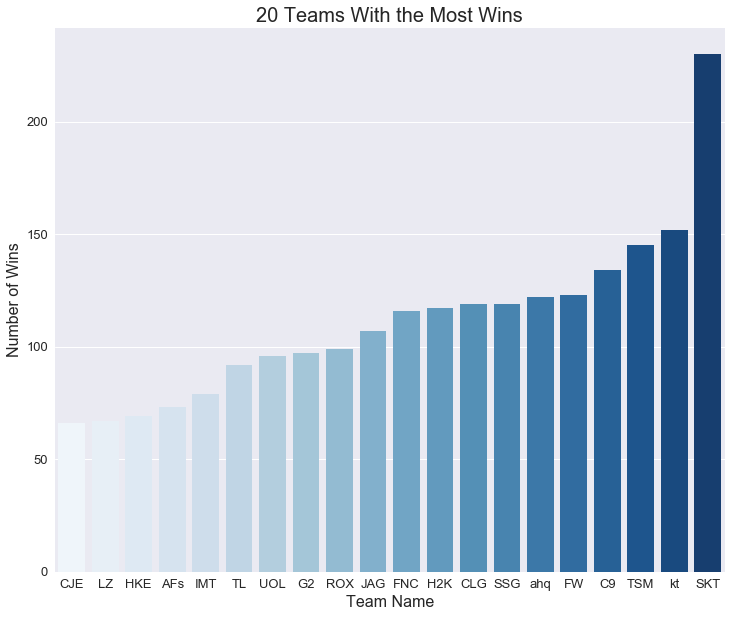

In [6]:
# sort wins for plotting
wins_df = wl_df[['team_name', 'wins']]
wins_df = wins_df.sort_values(by='wins')
wins_df = wins_df.tail(20)

# create plot
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.barplot(x='team_name', y='wins', palette='Blues', data=wins_df);
plt.title("20 Teams With the Most Wins",fontsize=20)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("Team Name", fontsize=16)
plt.ylabel("Number of Wins", fontsize=16);

SKT is legendary in the LoL professional league. The Korean team has won all three World Championships they have participated in. TSM and C9 also stand out as two of the most popular U.S. based teams. 

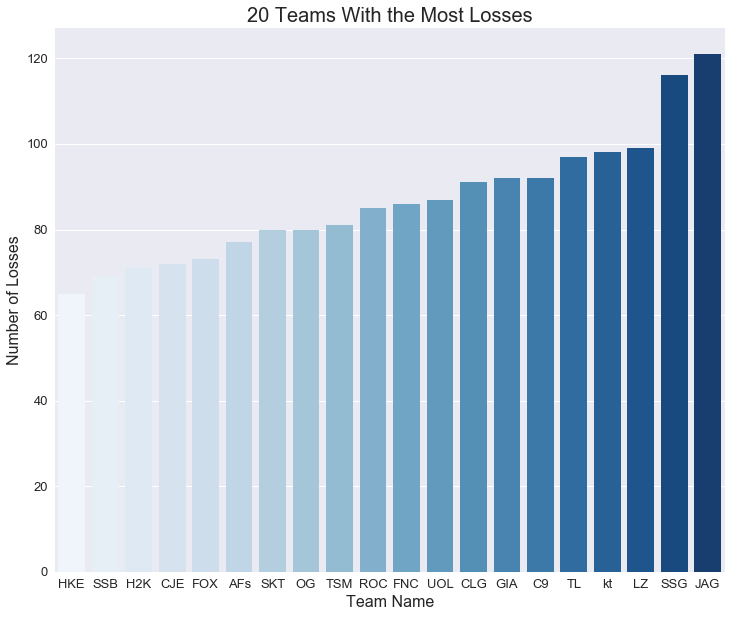

In [7]:
# sort losses for plotting
loss_df = wl_df[['team_name', 'losses']]
loss_df = loss_df.sort_values(by='losses')
loss_df = loss_df.tail(20)

# create plot
# create plot
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.barplot(x='team_name', y='losses', palette='Blues', data=loss_df);
plt.title("20 Teams With the Most Losses",fontsize=20)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("Team Name", fontsize=16)
plt.ylabel("Number of Losses", fontsize=16);

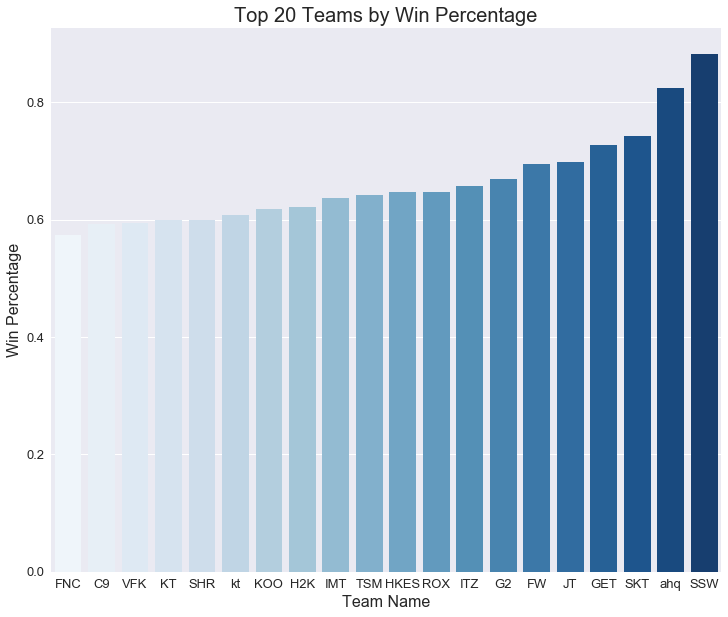

In [8]:
# sort losses for plotting
pct_df = wl_df[['team_name', 'win_pct']]
pct_df = pct_df.sort_values(by='win_pct')
pct_df = pct_df.tail(20)

# create plot
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.barplot(x='team_name', y='win_pct', palette='Blues', data=pct_df);
plt.title("Top 20 Teams by Win Percentage",fontsize=20)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("Team Name", fontsize=16)
plt.ylabel("Win Percentage", fontsize=16);

Win percentage is the best metric to see which teams perform well over the long run. SSW (Samsung White) is a since disbanded squad that had a strong run earlier in the game’s history. SKT and ahq are the best current teams. G2 is a recent addition to the European league.

## Bans

Bans take place during the pregame ‘draft’ period, when teams decide which Champion’s to play in the coming match. As previously noted there are ~140 Champions that can be picked. The bans are used to block the opposing team from choosing certain Champions. For years each team received three bans. Recently, this was upped to 5 bans per team.

One possible reason for the popularity of LoL could be the devotion Riot has to updating their game for balance and playability. The Champions are constantly being tweaked, upgraded, or otherwise altered. Because of this flux in how Champions are perceived by the community I will break bans down by year, and then look at overall numbers.


In [9]:
# prepare ban data split across 5 column for aggregation
bans = gen_df[['year', 'ban_1', 'ban_2', 'ban_3', 'ban_4', 'ban_5']]
bans2 = gen_df[['ban_1', 'ban_2', 'ban_3', 'ban_4', 'ban_5']]

bans2 = bans2.rename(columns = {'ban_1':'ban1',
                                'ban_2':'ban2',
                                'ban_3':'ban3',
                                'ban_4':'ban4',
                                'ban_5':'ban5',})
bans_df = bans.join(bans2)

In [10]:
# obtain counts for each champion ban
bans_pt = pd.pivot_table(bans_df, index=['year', 'ban_1'], values=['ban1'], aggfunc='count').reset_index()
bans_pt = bans_pt.rename(columns={'ban_1':'champion'})

bans_pt2 = pd.pivot_table(bans_df, index=['year', 'ban_2'], values=['ban2'], aggfunc='count').reset_index()
bans_pt2 = bans_pt2.rename(columns={'ban_2':'champion'})

bans_pt3 = pd.pivot_table(bans_df, index=['year', 'ban_3'], values=['ban3'], aggfunc='count').reset_index()
bans_pt3 = bans_pt3.rename(columns={'ban_3':'champion'})

bans_pt4 = pd.pivot_table(bans_df, index=['year', 'ban_4'], values=['ban4'], aggfunc='count').reset_index()
bans_pt4 = bans_pt4.rename(columns={'ban_4':'champion'})

bans_pt5 = pd.pivot_table(bans_df, index=['year', 'ban_5'], values=['ban5'], aggfunc='count').reset_index()
bans_pt5 = bans_pt5.rename(columns={'ban_5':'champion'})

# join to one dataframe and get sum
pt_merged = pd.merge(bans_pt, bans_pt2, how='outer', left_on=['year','champion'], right_on=['year','champion'])
pt_merged = pd.merge(pt_merged, bans_pt3, how='outer', left_on=['year','champion'], right_on=['year','champion'])
pt_merged = pd.merge(pt_merged, bans_pt4, how='outer', left_on=['year','champion'], right_on=['year','champion'])
pt_merged = pd.merge(pt_merged, bans_pt5, how='outer', left_on=['year','champion'], right_on=['year','champion'])
pt_merged = pt_merged.fillna(0)
pt_merged['ban_sums'] = pt_merged.ban1 + pt_merged.ban2 + pt_merged.ban3 + pt_merged.ban4 + pt_merged.ban5
pt_merged = pt_merged[['year', 'champion', 'ban_sums']].sort_values(by=['year', 'ban_sums'])

In [11]:
# separate dataframes by year
df_14 = pt_merged.loc[pt_merged.year == 2014,:].tail(10)
df_15 = pt_merged.loc[pt_merged.year == 2015,:].tail(10)
df_16 = pt_merged.loc[pt_merged.year == 2016,:].tail(10)
df_17 = pt_merged.loc[pt_merged.year == 2017,:].tail(10)

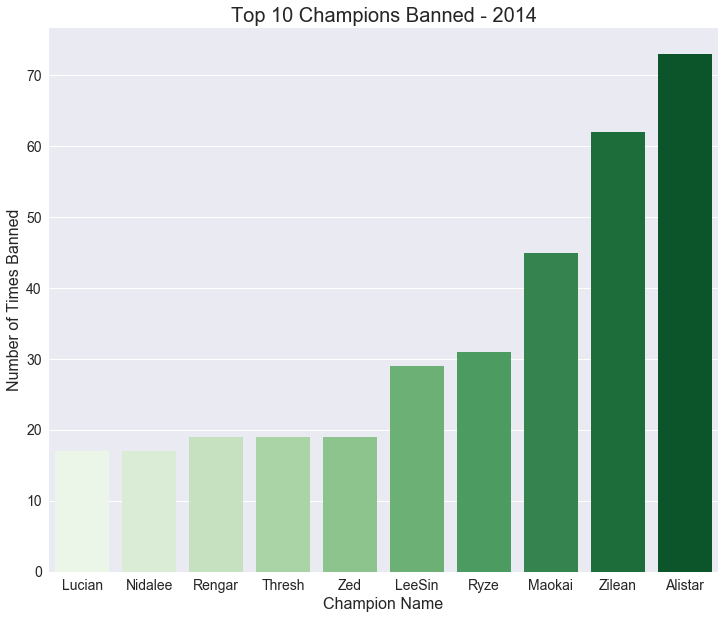

In [12]:
# create plot - most banned champion 2014
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.barplot(x='champion', y='ban_sums', palette=('Greens'), data=df_14);
plt.title("Top 10 Champions Banned - 2014",fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Champion Name", fontsize=16)
plt.ylabel("Number of Times Banned", fontsize=16);

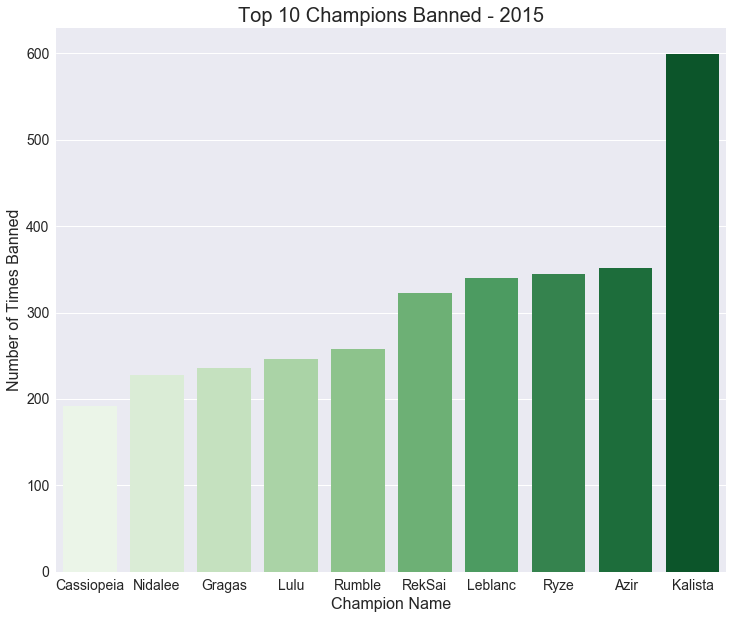

In [13]:
# create plot - most banned champion 2015
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.barplot(x='champion', y='ban_sums', palette='Greens', data=df_15);
plt.title("Top 10 Champions Banned - 2015",fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Champion Name", fontsize=16)
plt.ylabel("Number of Times Banned", fontsize=16);

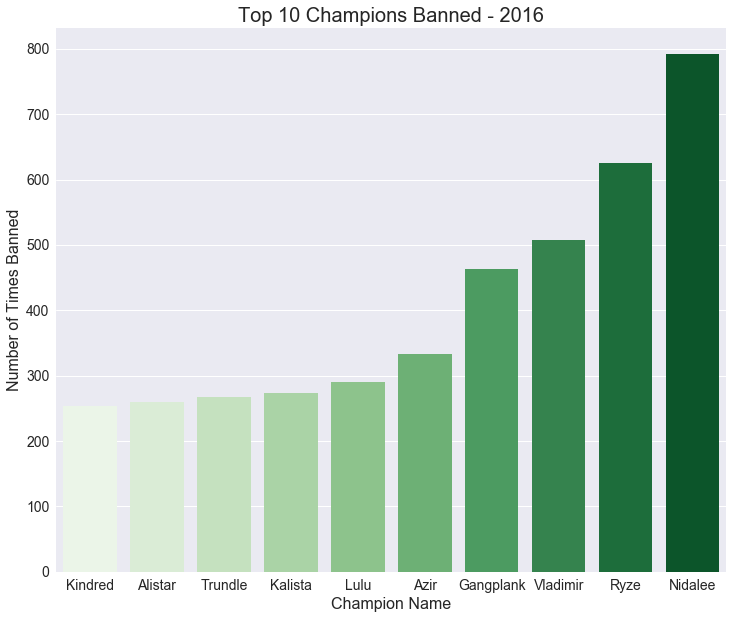

In [14]:
# create plot - most banned champion 2016
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.barplot(x='champion', y='ban_sums', palette='Greens', data=df_16);
plt.title("Top 10 Champions Banned - 2016",fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Champion Name", fontsize=16)
plt.ylabel("Number of Times Banned", fontsize=16);

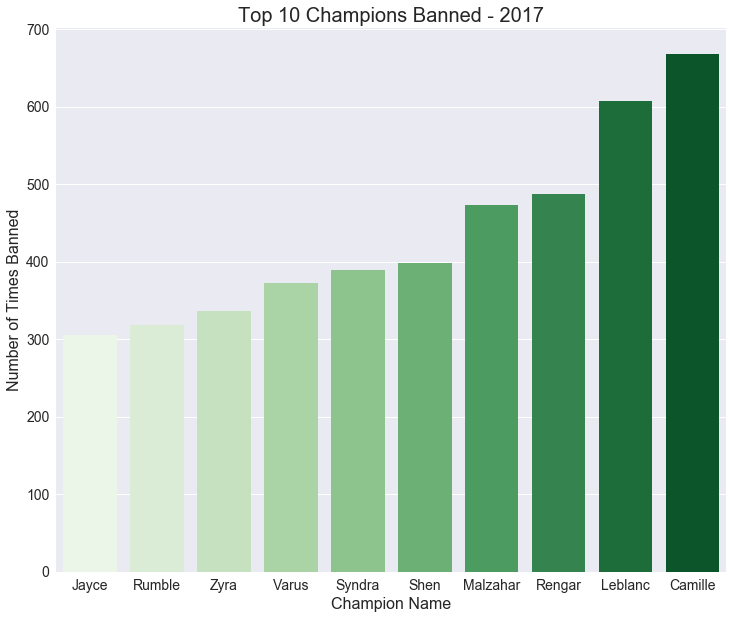

In [15]:
# create plot - most banned champion 2017
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.barplot(x='champion', y='ban_sums', palette='Greens', data=df_17);
plt.title("Top 10 Champions Banned - 2017",fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Champion Name", fontsize=16)
plt.ylabel("Number of Times Banned", fontsize=16);

In [16]:
# obtain counts for each champion ban
bans_pt = pd.pivot_table(bans_df, index=['ban_1'], values=['ban1'], aggfunc='count').reset_index()
bans_pt = bans_pt.rename(columns={'ban_1':'champion'})

bans_pt2 = pd.pivot_table(bans_df, index=['ban_2'], values=['ban2'], aggfunc='count').reset_index()
bans_pt2 = bans_pt2.rename(columns={'ban_2':'champion'})

bans_pt3 = pd.pivot_table(bans_df, index=['ban_3'], values=['ban3'], aggfunc='count').reset_index()
bans_pt3 = bans_pt3.rename(columns={'ban_3':'champion'})

bans_pt4 = pd.pivot_table(bans_df, index=['ban_4'], values=['ban4'], aggfunc='count').reset_index()
bans_pt4 = bans_pt4.rename(columns={'ban_4':'champion'})

bans_pt5 = pd.pivot_table(bans_df, index=['ban_5'], values=['ban5'], aggfunc='count').reset_index()
bans_pt5 = bans_pt5.rename(columns={'ban_5':'champion'})

# join to one dataframe and get sum
pt_merged = pd.merge(bans_pt, bans_pt2, how='outer', left_on=['champion'], right_on=['champion'])
pt_merged = pd.merge(pt_merged, bans_pt3, how='outer', left_on=['champion'], right_on=['champion'])
pt_merged = pd.merge(pt_merged, bans_pt4, how='outer', left_on=['champion'], right_on=['champion'])
pt_merged = pd.merge(pt_merged, bans_pt5, how='outer', left_on=['champion'], right_on=['champion'])
pt_merged = pt_merged.fillna(0)
pt_merged['ban_sums'] = pt_merged.ban1 + pt_merged.ban2 + pt_merged.ban3 + pt_merged.ban4 + pt_merged.ban5
pt_merged = pt_merged[['champion', 'ban_sums']].sort_values(by=['ban_sums'])

In [17]:
overall_low = pt_merged.head(10)
overall_high = pt_merged.tail(10)

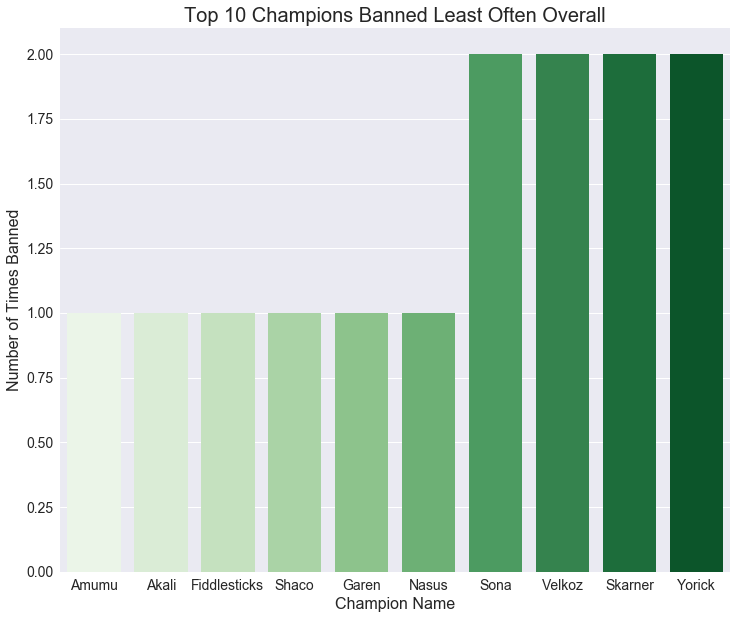

In [18]:
# create plot - most banned champion 2017
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.barplot(x='champion', y='ban_sums', palette='Greens', data=overall_low);
plt.title("Top 10 Champions Banned Least Often Overall",fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Champion Name", fontsize=16)
plt.ylabel("Number of Times Banned", fontsize=16);

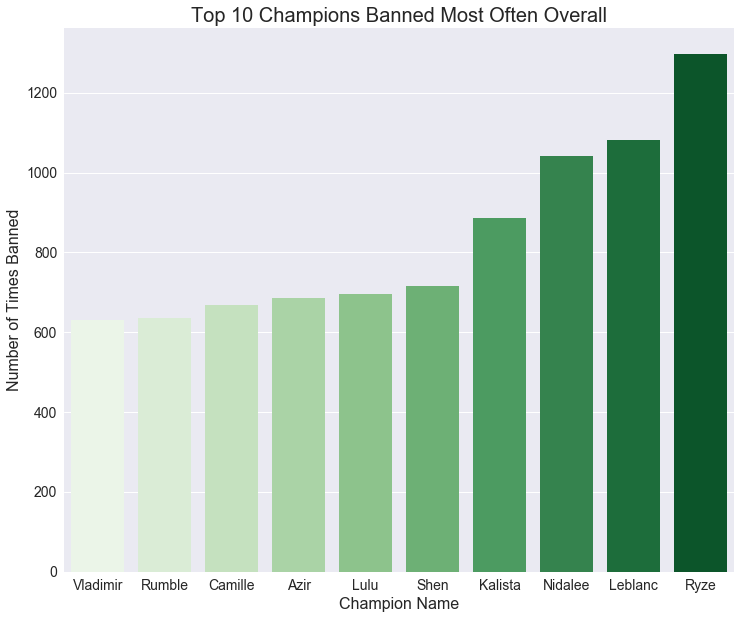

In [19]:
# create plot - most banned champion 2017
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.barplot(x='champion', y='ban_sums', palette='Greens', data=overall_high);
plt.title("Top 10 Champions Banned Most Often Overall",fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Champion Name", fontsize=16)
plt.ylabel("Number of Times Banned", fontsize=16);

Ryze jumps out as appearing multiple times on these charts. Ryze is in an interesting Champion in that he builds his damage in an unconventional way, and has historically been very hard to balance correctly. Nidalee is another unique pick that can shapeshift and has access to more skills then most other Champions. Riot has moved her around the map several times, but always seems to come out either too strong or too weak.

## Kills, Deaths and Assists

One of the most basic measurements of how a team is doing in a given match is their ratio of kills to deaths. Kills and assists award gold which can be used to purchase powerful items. Deaths take a player out of the game for a certain amount of time, limiting the gold they can generate themselves. Kills can also allow the victorious team to take neutral objectives (discusses further down the report) which grant buffs as well as additional gold. 

Because KDA is such a useful metric for discussing LoL I will take a look at team-based scores, as well as individual player scores.

In [20]:
tk_df.head()

,match_id,red_or_blue_side,team_name,kills,deaths,assists,kda_ratio
0,001a1f289e3bab22,Blue,ANC,10.0,23.0,24.0,1.478261
1,001a1f289e3bab22,Red,CJE,23.0,10.0,56.0,7.900000
2,001f50c8547e2e73,Blue,EDG,28.0,10.0,60.0,8.800000
3,001f50c8547e2e73,Red,AHQ,10.0,28.0,23.0,1.178571
4,002f613ae09ad421,Blue,TPA,13.0,0.0,30.0,43.000000


In [21]:
tk_pt = pd.pivot_table(tk_df, index=['team_name'], values=['kda_ratio'], aggfunc=np.mean).reset_index().sort_values(by='kda_ratio')
tk_plot = tk_pt.tail(20)

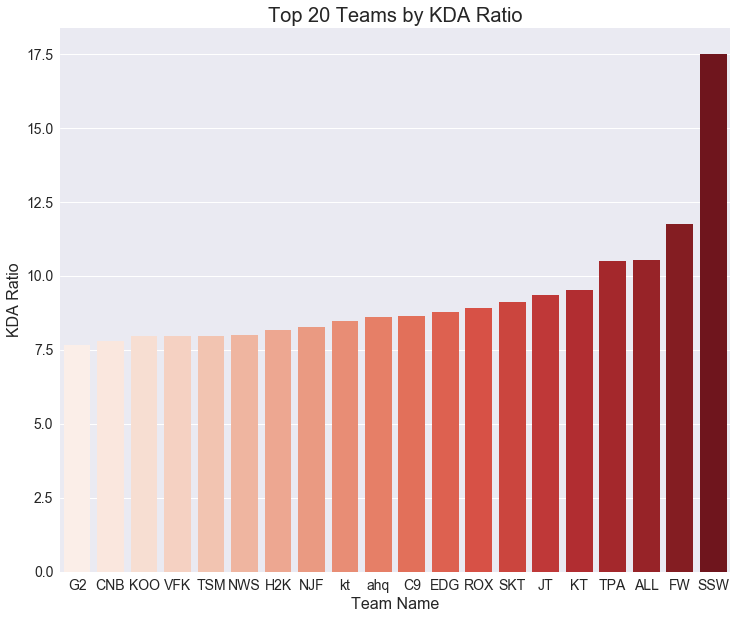

In [22]:
# create plot - most banned champion 2017
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.barplot(x='team_name', y='kda_ratio', palette='Reds', data=tk_plot);
plt.title("Top 20 Teams by KDA Ratio",fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Team Name", fontsize=16)
plt.ylabel("KDA Ratio", fontsize=16);

SSW, ALL, and TPA are legacy teams from the game’s earlier days. SSW dominated the 2014 World Championships before disbanding, and their players moving to other squads. More recent entries on the chart are C9, EDG, and SKT. The gradual evening of the global talent-pool is evident from this chart as well. I don’t think it is possible for a team to achieve similar levels of success now, as SSW did a few years back.

## Individual players

In [23]:
pk_df.head()

,match_id,team_name,player,kills,deaths,assists,kda_ratio
0,001a1f289e3bab22,ANC,SnowFlower,1,4,6,1.750000
1,001a1f289e3bab22,ANC,ikssu,1,3,4,1.666667
2,001a1f289e3bab22,ANC,lira,1,7,6,1.000000
3,001a1f289e3bab22,CJE,Ambition,4,2,12,8.000000
4,001a1f289e3bab22,CJE,Coco,8,2,10,9.000000


In [24]:
# get number of games played
pk_pt2 = pd.pivot_table(pk_df, index=['player'], values= 'kda_ratio', aggfunc='count').reset_index().sort_values(by='kda_ratio')
# players with the most games played
pk_pt2.tail(10)

,player,kda_ratio
287,Kuro,243
525,Ssumday,248
414,PraY,252
40,Arrow,259
205,GorillA,259
505,Smeb,260
480,Score,260
164,Faker,272
613,Wolf,298
52,Bang,310


In [25]:
pk_pt = pd.pivot_table(pk_df, index=['player'], values= 'kda_ratio', aggfunc=np.mean).reset_index().sort_values(by='kda_ratio')
pk_merge = pd.merge(pk_pt2, pk_pt, on='player')
pk_merge = pk_merge.loc[pk_merge['kda_ratio_x'] >= 40,:]
pk_merge = pk_merge.sort_values(by='kda_ratio_y')
pk_plot = pk_merge.tail(20)

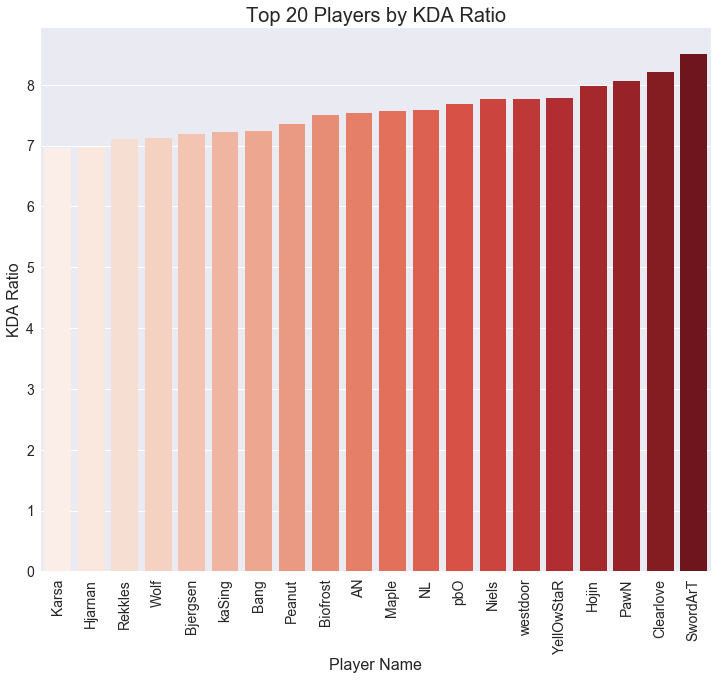

In [26]:
# create plot - most banned champion 2017
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.barplot(x='player', y='kda_ratio_y', palette='Reds', data=pk_plot);
plt.title("Top 20 Players by KDA Ratio",fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(rotation=90)
plt.xlabel("Player Name", fontsize=16)
plt.ylabel("KDA Ratio", fontsize=16);

The players on this list tend to be the more conservative types (Rekkles) or supports, which are not generally the first target in a match (SwordArT, YellOwStaR). Bjergson is notable for being the most popular Western LoL player. He is a member of TSM. The support for TSM for the last year or so has been Biofrost, who also shows up here. Biofrost is interesting as he plays fairly aggressively, but for a team that is generally well-coordinated and individually strong. 

## Positional KDA Ratios

In [27]:
# get series of each player's position
top = gen_df.loc[:,'top_player']
jgl = gen_df.loc[:,'jungle_player']
mid = gen_df.loc[:,'mid_player']
adc = gen_df.loc[:,'adc_player']
sup = gen_df.loc[:,'support_player']

In [28]:
# create dataframes for each position
top_df = pk_df.loc[pk_df.player.isin(top),:]
jgl_df = pk_df.loc[pk_df.player.isin(jgl),:]
mid_df = pk_df.loc[pk_df.player.isin(mid),:]
adc_df = pk_df.loc[pk_df.player.isin(adc),:]
sup_df = pk_df.loc[pk_df.player.isin(sup),:]

In [29]:
# get number of games played
top_pt = pd.pivot_table(top_df, index=['player'], values= 'kda_ratio', aggfunc='count').reset_index().sort_values(by='kda_ratio')

# average kda_ratio
top_pt2 = pd.pivot_table(top_df, index=['player'], values= 'kda_ratio', aggfunc=np.mean).reset_index().sort_values(by='kda_ratio')

# create dataframe with top 20 players
top_merge = pd.merge(top_pt2, top_pt, on='player')
top_merge = top_merge.loc[top_merge['kda_ratio_y'] >= 40,:]
top_merge = top_merge.sort_values(by='kda_ratio_x')
top_plot = top_merge.tail(20)

In [30]:
# get number of games played
jgl_pt = pd.pivot_table(jgl_df, index=['player'], values= 'kda_ratio', aggfunc='count').reset_index().sort_values(by='kda_ratio')

# average kda_ratio
jgl_pt2 = pd.pivot_table(jgl_df, index=['player'], values= 'kda_ratio', aggfunc=np.mean).reset_index().sort_values(by='kda_ratio')

# create dataframe with top 20 players
jgl_merge = pd.merge(jgl_pt2, jgl_pt, on='player')
jgl_merge = jgl_merge.loc[jgl_merge['kda_ratio_y'] >= 40,:]
jgl_merge = jgl_merge.sort_values(by='kda_ratio_x')
jgl_plot = jgl_merge.tail(20)

In [31]:
# get number of games played
mid_pt = pd.pivot_table(mid_df, index=['player'], values= 'kda_ratio', aggfunc='count').reset_index().sort_values(by='kda_ratio')

# average kda_ratio
mid_pt2 = pd.pivot_table(mid_df, index=['player'], values= 'kda_ratio', aggfunc=np.mean).reset_index().sort_values(by='kda_ratio')

# create dataframe with top 20 players
mid_merge = pd.merge(mid_pt2, mid_pt, on='player')
mid_merge = mid_merge.loc[mid_merge['kda_ratio_y'] >= 40,:]
mid_merge = mid_merge.sort_values(by='kda_ratio_x')
mid_plot = mid_merge.tail(20)

In [32]:
# get number of games played
adc_pt = pd.pivot_table(adc_df, index=['player'], values= 'kda_ratio', aggfunc='count').reset_index().sort_values(by='kda_ratio')

# average kda_ratio
adc_pt2 = pd.pivot_table(adc_df, index=['player'], values= 'kda_ratio', aggfunc=np.mean).reset_index().sort_values(by='kda_ratio')

# create dataframe with top 20 players
adc_merge = pd.merge(adc_pt2, adc_pt, on='player')
adc_merge = adc_merge.loc[adc_merge['kda_ratio_y'] >= 40,:]
adc_merge = adc_merge.sort_values(by='kda_ratio_x')
adc_plot = adc_merge.tail(20)

In [33]:
# get number of games played
sup_pt = pd.pivot_table(sup_df, index=['player'], values= 'kda_ratio', aggfunc='count').reset_index().sort_values(by='kda_ratio')

# average kda_ratio
sup_pt2 = pd.pivot_table(sup_df, index=['player'], values= 'kda_ratio', aggfunc=np.mean).reset_index().sort_values(by='kda_ratio')

# create dataframe with top 20 players
sup_merge = pd.merge(sup_pt2, sup_pt, on='player')
sup_merge = sup_merge.loc[sup_merge['kda_ratio_y'] >= 40,:]
sup_merge = sup_merge.sort_values(by='kda_ratio_x')
sup_plot = sup_merge.tail(20)

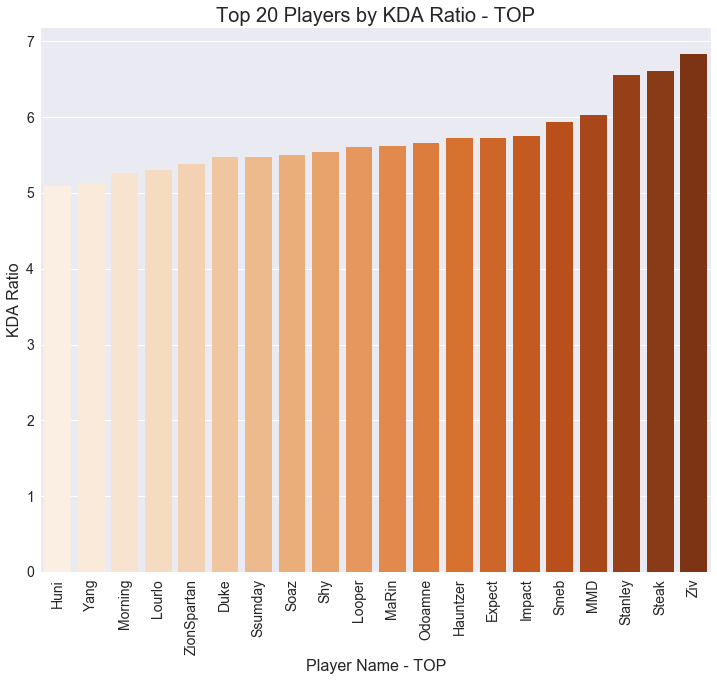

In [34]:
# create plot - top
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.barplot(x='player', y='kda_ratio_x', palette='Oranges', data=top_plot);
plt.title("Top 20 Players by KDA Ratio - TOP",fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(rotation=90)
plt.xlabel("Player Name - TOP", fontsize=16)
plt.ylabel("KDA Ratio", fontsize=16);

‘Top’ refers to the top lane on the game map. These players generally play sturdier, ‘tank’ class Champions. The inclusion of ZionSpartan and Lourlo is somewhat surprising as they are decent, but not particularly noteworthy top-laners. Hauntzer is another member of TSM. Smeb is probably the best current top-laner, and his position on the chart reflects that. 

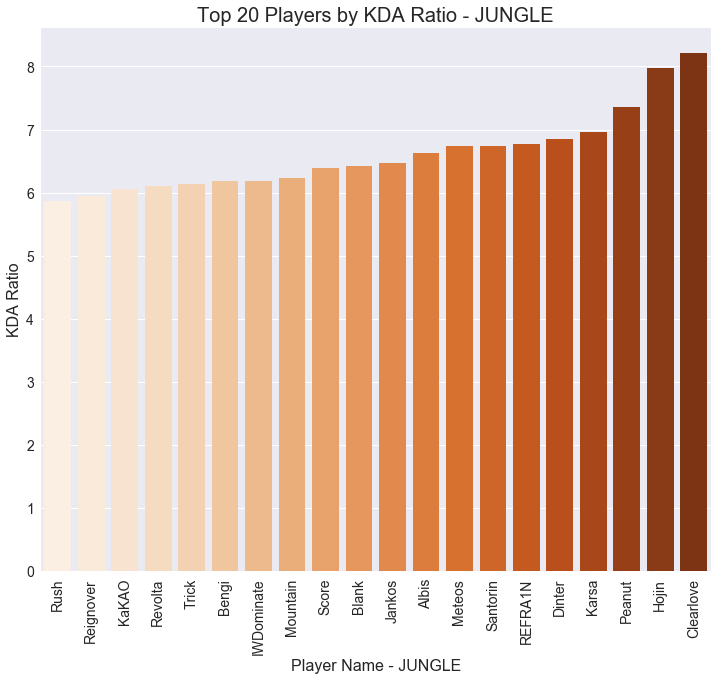

In [35]:
# create plot - top
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.barplot(x='player', y='kda_ratio_x', palette='Oranges', data=jgl_plot);
plt.title("Top 20 Players by KDA Ratio - JUNGLE",fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(rotation=90)
plt.xlabel("Player Name - JUNGLE", fontsize=16)
plt.ylabel("KDA Ratio", fontsize=16);

‘Jungle’ players roam the jungle areas on the map, and it’s their job to provide pressure to the other lanes, and help their team gain an advantage. Many of the players on this list are retired or otherwise out of the game. Meteos is one of the most notable examples. When he started as a member of C9, his slow-paced playstyle had a dramatic impact on how the game was played world-wide. Peanut is one of the better current junglers and is currently a member of SKT.

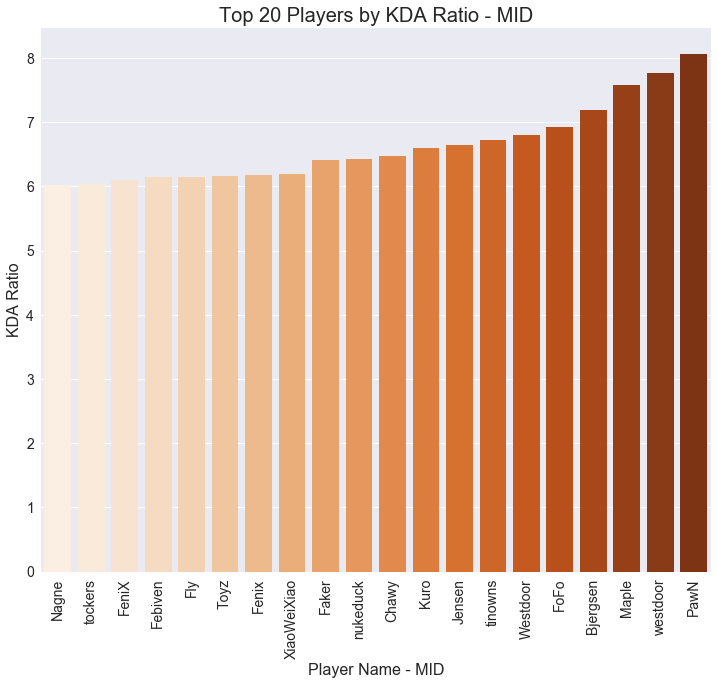

In [36]:
# create plot - top
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.barplot(x='player', y='kda_ratio_x', palette='Oranges', data=mid_plot);
plt.title("Top 20 Players by KDA Ratio - MID",fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(rotation=90)
plt.xlabel("Player Name - MID", fontsize=16)
plt.ylabel("KDA Ratio", fontsize=16);

Mid refers to the middle lane. These players chose mage-type Champions generally that excel at dishing out damage. A player that I’ve not yet mentioned shows up here – Faker. A member of SKT, Faker is known as the greatest LoL player ever. While his KDA ratio is quite good, his mastery of strategy and knack for clutch plays that can turn games around are his hallmarks. 

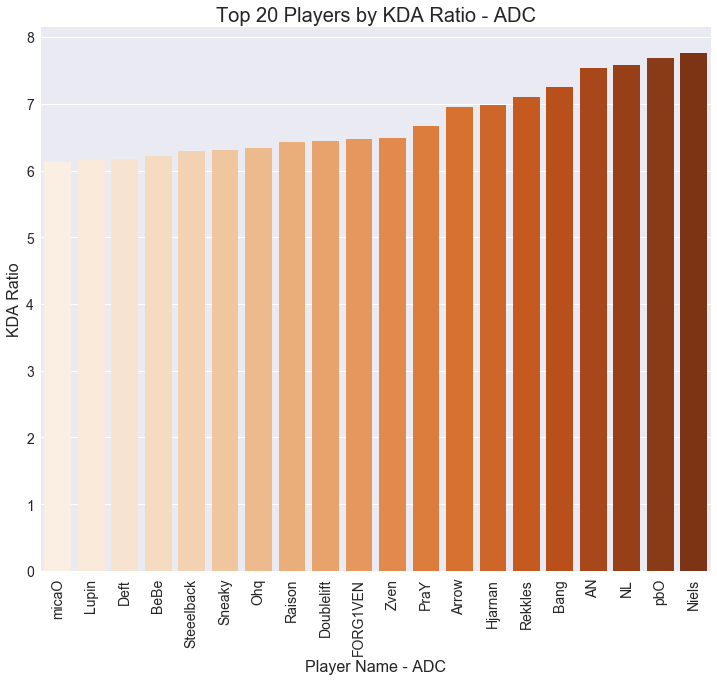

In [37]:
# create plot - top
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.barplot(x='player', y='kda_ratio_x', palette='Oranges', data=adc_plot);
plt.title("Top 20 Players by KDA Ratio - ADC",fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(rotation=90)
plt.xlabel("Player Name - ADC", fontsize=16)
plt.ylabel("KDA Ratio", fontsize=16);

ADC (Attack Damage Carry) players can be found in the bottom lane. These players tend to pick ranged damage dealers. Doublelift is one of the more notable players here as he has been around since the beginning of professional LoL. Currently, he is a member of TSM and remains a very effective player. 

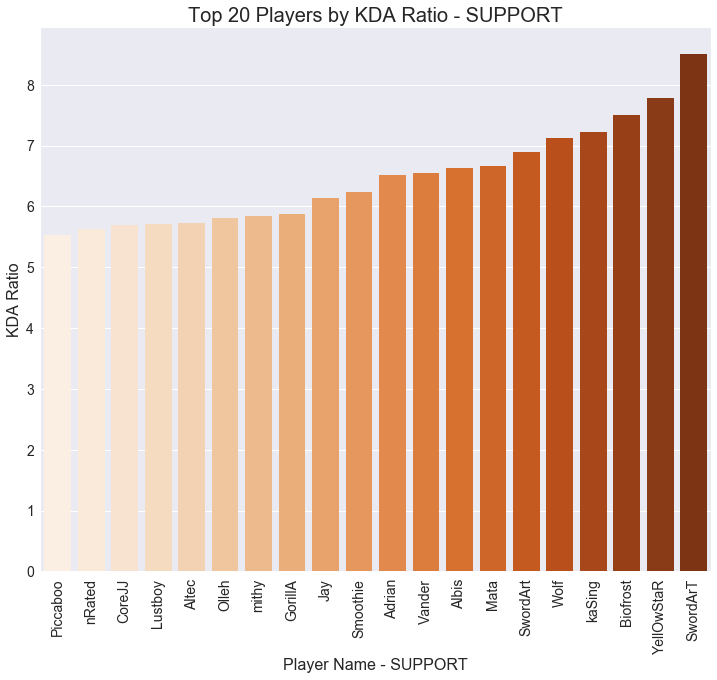

In [38]:
# create plot - top
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.barplot(x='player', y='kda_ratio_x', palette='Oranges', data=sup_plot);
plt.title("Top 20 Players by KDA Ratio - SUPPORT",fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(rotation=90)
plt.xlabel("Player Name - SUPPORT", fontsize=16)
plt.ylabel("KDA Ratio", fontsize=16);

Support players begin the game in the bottom lane as well, supporting the ADC. These players are not damage dealers, instead they focus on crowd control (disabling enemy players), healing, shielding, and on placing wards around the map which grant vision to their team. Biofrost being so high up on the list is quite surprising – for a new player on an established team he has performed extremely well.

## Most Kills, Deaths and Assists

Let’s quickly take a look out the best and worst performances across the dataset.

In [39]:
kills_df = pk_df[['player', 'kills']]
kills_df = kills_df.sort_values('kills')
kills_plot = kills_df.tail(20)

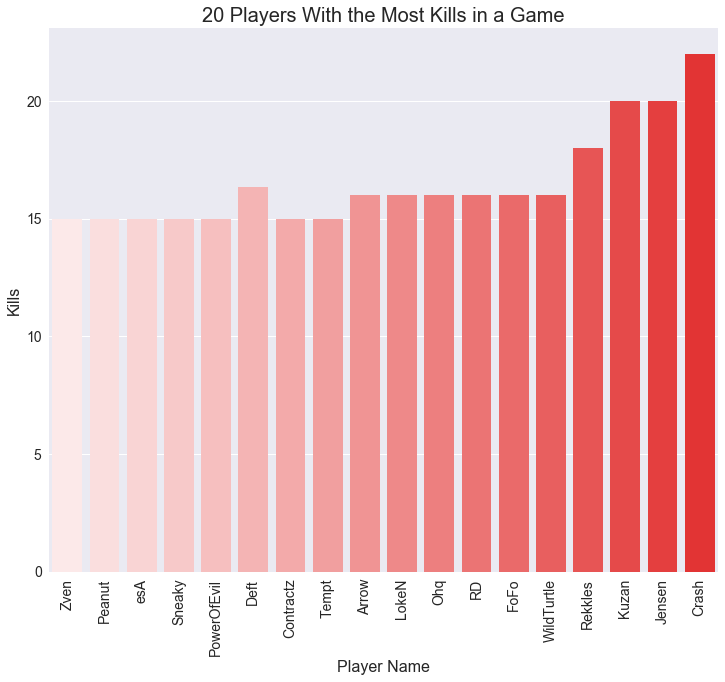

In [40]:
# create plot - top
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
pal = sns.light_palette('red', 20)
sns.barplot(x='player', y='kills', palette=pal, data=kills_plot, ci=None);
plt.title("20 Players With the Most Kills in a Game",fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(rotation=90)
plt.xlabel("Player Name", fontsize=16)
plt.ylabel("Kills", fontsize=16);

In [41]:
deaths_df = pk_df[['player', 'deaths']]
deaths_df = deaths_df.sort_values('deaths')
deaths_plot = deaths_df.tail(20)

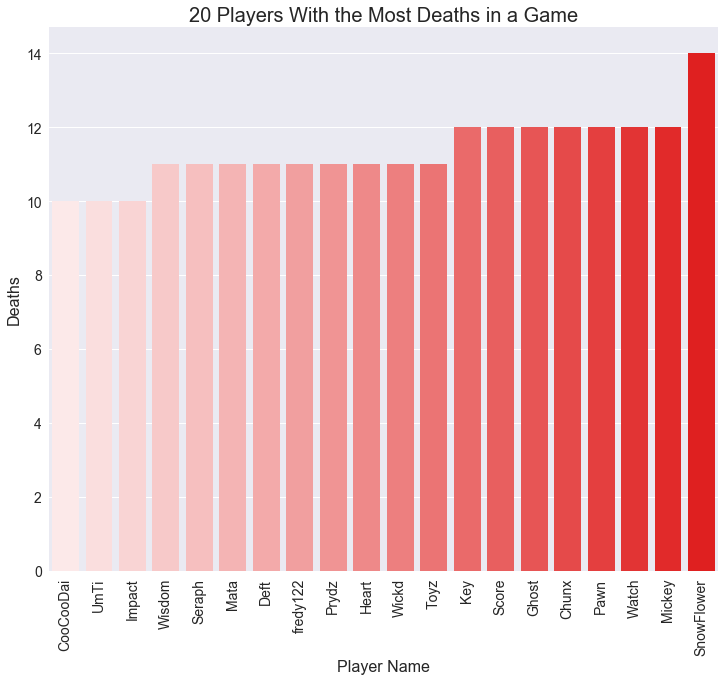

In [42]:
# create plot - top
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
pal = sns.light_palette('red', 20)
sns.barplot(x='player', y='deaths', palette=pal, data=deaths_plot);
plt.title("20 Players With the Most Deaths in a Game",fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(rotation=90)
plt.xlabel("Player Name", fontsize=16)
plt.ylabel("Deaths", fontsize=16);

In [43]:
assists_df = pk_df[['player', 'assists']]
assists_df = assists_df.sort_values('assists')
assists_plot = assists_df.tail(20)

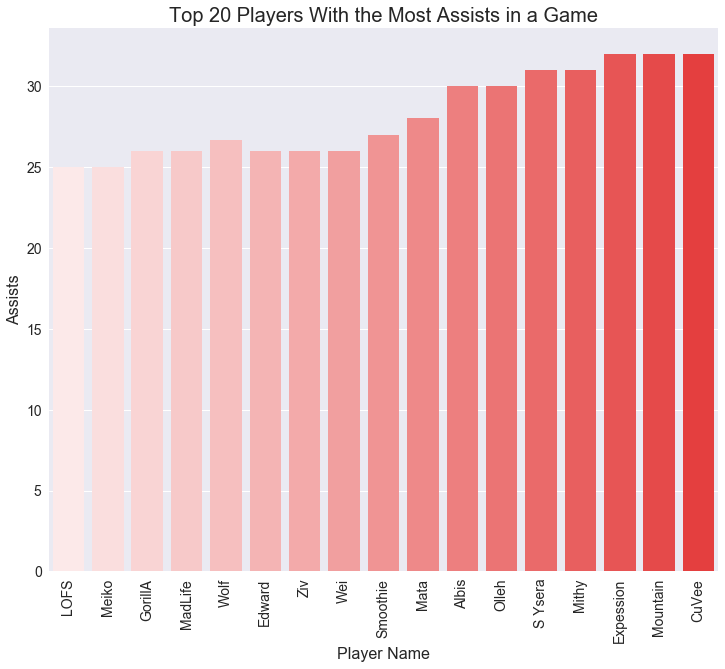

In [44]:
# create plot - top
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
pal = sns.light_palette('red', 20)
sns.barplot(x='player', y='assists', palette=pal, data=assists_plot, ci=None);
plt.title("Top 20 Players With the Most Assists in a Game",fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(rotation=90)
plt.xlabel("Player Name", fontsize=16)
plt.ylabel("Assists", fontsize=16);

# Gold Totals

As mentioned, gold totals for each team give an idea of relative power levels for each team. I will be looking at both total gold values for each team at 1 minute intervals, as well as the gold differential between each team. For this analysis, I will take a close look at the 2016 World Championship Finals between Samsung Galaxy and SKT. 

In [45]:
gt_df.head()

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,001a1f289e3bab22,LCK,Summer_Season,2015,ANC,blue,0,38,total_gold,NaN,NaN,2415,2430,2751,3929,5219,6418,8156,9520,10681,12036,13678,15590,16782,18417,20052,21608,23396,24248,25691,27452.0,30446.0,31672.0,33665.0,36399.0,37571.0,38659.0,39757.0,41498.0,42861.0,44378.0,45719.0,47095.0,48551.0,49524.0,51200.0,52518.0,53247.0,53893.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001a1f289e3bab22,LCK,Summer_Season,2015,CJE,red,1,38,total_gold,NaN,NaN,2415,2415,2705,4062,5279,7322,8661,10372,11444,13260,14676,15723,18119,19663,21237,22809,24997,28072,30162,31469.0,32490.0,34362.0,36662.0,37981.0,39398.0,40331.0,41652.0,44239.0,45948.0,47134.0,49334.0,51052.0,52586.0,53374.0,55245.0,56618.0,62198.0,62846.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001f50c8547e2e73,Season_World_Championship,International,2014,EDG,blue,1,37,total_gold,NaN,NaN,2415,2415,2705,3817,4956,6132,7499,8605,9942,11434,13028,15942,17653,19941,21320,23236,24835,26384,29350,32365.0,33752.0,35258.0,39070.0,40973.0,42591.0,45637.0,46672.0,48001.0,49458.0,51181.0,52245.0,54233.0,58476.0,61061.0,62324.0,65435.0,69584.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001f50c8547e2e73,Season_World_Championship,International,2014,AHQ,red,0,37,total_gold,NaN,NaN,2415,2415,2705,3728,5048,6306,7308,8536,9689,11072,12952,13978,15289,16639,18575,19558,22343,23318,24585,25342.0,26616.0,27778.0,29198.0,30997.0,32647.0,34549.0,35535.0,36591.0,38024.0,39272.0,40585.0,41883.0,42547.0,43836.0,45798.0,46951.0,47804.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002f613ae09ad421,LMS,Spring_Season,2016,TPA,blue,1,30,total_gold,NaN,NaN,2500,2500,2785,4216,6193,7618,9674,11203,13004,14497,15653,17089,19084,20938,22437,24228,27072,28475,31466,34244.0,37178.0,39046.0,41074.0,42978.0,44964.0,48148.0,49707.0,51624.0,54594.0,56268.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# select only the games from 2016 World Championships
champ_df = gt_df.loc[(gt_df['league'] == 'Season_World_Championship') &
                      (gt_df['year'] == 2016) & (gt_df['type'] == 'total_gold'),:]

# the finals were played by SKT and SSG
finals_df = champ_df.loc[(champ_df['team_name'] == 'SSG') | (champ_df['team_name'] == 'SKT'),:]

In [47]:
# select only the 5 games from the finals
fin_df = finals_df.loc[(finals_df['match_id'] == '473fc1deff74591b') |
                      (finals_df['match_id'] == '2a1d6285ce9dd71f') |
                      (finals_df['match_id'] == '6ca759012b24b8b1') |
                      (finals_df['match_id'] == 'ac33fc72f78724a8') |
                      (finals_df['match_id'] == 'e5af5592e36bdb01'),:]
fin_df

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
1222,2a1d6285ce9dd71f,Season_World_Championship,International,2016,SKT,blue,0,47,total_gold,NaN,NaN,2500,2500,2797,4235,5685,7068,8471,9869,11214,12622,14220,15670,17167,18746,20428,22024,23489,24690,26518,28394.0,30574.0,32396.0,34122.0,35950.0,37934.0,39949.0,41397.0,43745.0,46155.0,48132.0,50799.0,52535.0,54365.0,55646.0,57384.0,58507.0,61254.0,63522.0,65195.0,67318.0,69274.0,71373.0,73437.0,75583.0,77319.0,78436.0,79438.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1223,2a1d6285ce9dd71f,Season_World_Championship,International,2016,SSG,red,1,47,total_gold,NaN,NaN,2500,2508,2730,4190,5780,7002,8615,9878,11406,12885,14445,15773,17453,18835,20448,22160,23655,25867,27694,30385.0,31806.0,33912.0,35687.0,37433.0,39309.0,41150.0,43159.0,44474.0,46042.0,47369.0,49141.0,50856.0,52337.0,56567.0,58778.0,63594.0,65179.0,66527.0,70150.0,71405.0,74360.0,75741.0,78141.0,79577.0,80764.0,83840.0,88011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2077,473fc1deff74591b,Season_World_Championship,International,2016,SKT,blue,1,32,total_gold,NaN,NaN,2500,2527,2699,4081,5450,6671,8051,9433,10903,12515,14030,15925,17597,20003,21382,24049,26376,28012,30863,32871.0,35147.0,37014.0,39542.0,41165.0,43748.0,45508.0,47480.0,50408.0,52096.0,56062.0,58580.0,62644.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2076,473fc1deff74591b,Season_World_Championship,International,2016,SSG,red,0,32,total_gold,NaN,NaN,2500,2527,2749,4340,5989,7479,8820,10392,12051,13620,15235,16454,18136,20232,21593,22766,24471,25992,27495,30230.0,31933.0,33049.0,34795.0,36364.0,37745.0,39045.0,40714.0,42156.0,43357.0,44578.0,46122.0,46926.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3204,6ca759012b24b8b1,Season_World_Championship,International,2016,SSG,blue,1,72,total_gold,NaN,NaN,2500,2500,2808,4262,5833,7027,8623,10129,11580,12816,14253,15465,17135,18572,20072,21497,23329,24804,26472,28310.0,29734.0,31369.0,33536.0,35187.0,36897.0,38092.0,39860.0,41711.0,43463.0,45419.0,47930.0,51455.0,54307.0,56731.0,60101.0,61449.0,62917.0,64788.0,66398.0,68053.0,69816.0,71299.0,73164.0,74615.0,75915.0,77848.0,79184.0,80548.0,82079.0,83439.0,84667.0,87503.0,89614.0,91001.0,92422.0,94508.0,96914.0,98223.0,100728.0,101940.0,103403.0,105120.0,107174.0,108314.0,110217.0,111769.0,113142.0,114680.0,117319.0,118714.0,121885.0,124522.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3205,6ca759012b24b8b1,Season_World_Championship,International,2016,SKT,red,0,72,total_gold,NaN,NaN,2500,2500,2774,4142,5744,7226,8768,10148,11620,13541,14870,16397,17973,19639,21676,23052,24916,26505,28132,30993.0,33341.0,35836.0,38807.0,41099.0,42936.0,46844.0,48463.0,50422.0,52591.0,54260.0,55261.0,56677.0,57962.0,59841.0,61638.0,64017.0,65864.0,67651.0,70274.0,72190.0,73909.0,75341.0,76598.0,77626.0,79619.0,81525.0,82800.0,84424.0,85895.0,87503.0,90082.0,92940.0,94322.0,96249.0,98170.0,99629.0,101074.0,103274.

In [48]:
# prepare data for graphing
game1 = fin_df.loc[(fin_df['match_id'] == 'e5af5592e36bdb01'),:]
game1 = game1.drop(['match_id', 'league', 'season', 'year', 'red_or_blue_side', 'result', 'game_length', 'type', 
            'player_name', 'champion'], axis=1)
game1 = game1.fillna(0)

# transpose data and rename columns 
game1 = game1.drop('team_name', axis=1)
game1 = game1.T
game1 = game1.rename(columns = {6814:'SSG',6815:'SKT'})

# only select rows where the game is being played
# after the game ends the values are NaN (0)
game1 = game1.loc[(game1['SKT'] != 0),:]

In [49]:
# create date time object
time = pd.date_range("0:00", "0:54", freq="1min", format='%H:%M')

# append to dataframe
game1['time'] = time
game1['time_m'] = game1['time'].dt.time

# set as index
game1 = game1.set_index('time_m')
game1 = game1.drop('time', axis=1)

In [50]:
# prepare data for graphing
game2 = fin_df.loc[(fin_df['match_id'] == '473fc1deff74591b'),:]
game2 = game2.drop(['match_id', 'league', 'season', 'year', 'red_or_blue_side', 'result', 'game_length', 'type', 
            'player_name', 'champion'], axis=1)
game2 = game2.fillna(0)

# transpose data and rename columns 
game2 = game2.drop('team_name', axis=1)
game2 = game2.T
game2 = game2.rename(columns = {2077:'SKT',2076:'SSG'})

# only select rows where the game is being played
# after the game ends the values are NaN (0)
game2 = game2.loc[(game2['SKT'] != 0),:]

In [51]:
# create date time object
time = pd.date_range("0:00", "0:31", freq="1min", format='%H:%M')

# append to dataframe
game2['time'] = time
game2['time_m'] = game2['time'].dt.time

# set as index
game2 = game2.set_index('time_m')
game2 = game2.drop('time', axis=1)

In [52]:
# prepare data for graphing
game3 = fin_df.loc[(fin_df['match_id'] == '6ca759012b24b8b1'),:]
game3 = game3.drop(['match_id', 'league', 'season', 'year', 'red_or_blue_side', 'result', 'game_length', 'type', 
            'player_name', 'champion'], axis=1)
game3 = game3.fillna(0)

# transpose data and rename columns 
game3 = game3.drop('team_name', axis=1)
game3 = game3.T
game3 = game3.rename(columns = {3205:'SKT',3204:'SSG'})

# only select rows where the game is being played
# after the game ends the values are NaN (0)
game3 = game3.loc[(game3['SKT'] != 0),:]

In [53]:
# create date time object
time = pd.date_range("0:00", "1:11", freq="1min", format='%H:%M')

# append to dataframe
game3['time'] = time
game3['time_m'] = game3['time'].dt.time

# set as index
game3 = game3.set_index('time_m')
game3 = game3.drop('time', axis=1)

In [54]:
# prepare data for graphing
game4 = fin_df.loc[(fin_df['match_id'] == '2a1d6285ce9dd71f'),:]
game4 = game4.drop(['match_id', 'league', 'season', 'year', 'red_or_blue_side', 'result', 'game_length', 'type', 
            'player_name', 'champion'], axis=1)
game4 = game4.fillna(0)

# transpose data and rename columns 
game4 = game4.drop('team_name', axis=1)
game4 = game4.T
game4 = game4.rename(columns = {1222:'SKT',1223:'SSG'})

# only select rows where the game is being played
# after the game ends the values are NaN (0)
game4 = game4.loc[(game4['SKT'] != 0),:]

In [55]:
# create date time object
time = pd.date_range("0:00", "0:46", freq="1min", format='%H:%M')

# append to dataframe
game4['time'] = time
game4['time_m'] = game4['time'].dt.time

# set as index
game4 = game4.set_index('time_m')
game4 = game4.drop('time', axis=1)

In [56]:
# prepare data for graphing
game5 = fin_df.loc[(fin_df['match_id'] == 'ac33fc72f78724a8'),:]
game5 = game5.drop(['match_id', 'league', 'season', 'year', 'red_or_blue_side', 'result', 'game_length', 'type', 
            'player_name', 'champion'], axis=1)
game5 = game5.fillna(0)

# transpose data and rename columns 
game5 = game5.drop('team_name', axis=1)
game5 = game5.T
game5 = game5.rename(columns = {5090:'SKT',5091:'SSG'})

# only select rows where the game is being played
# after the game ends the values are NaN (0)
game5 = game5.loc[(game5['SKT'] != 0),:]

In [57]:
# create date time object
time = pd.date_range("0:00", "0:49", freq="1min", format='%H:%M')

# append to dataframe
game5['time'] = time
game5['time_m'] = game5['time'].dt.time

# set as index
game5 = game5.set_index('time_m')
game5 = game5.drop('time', axis=1)

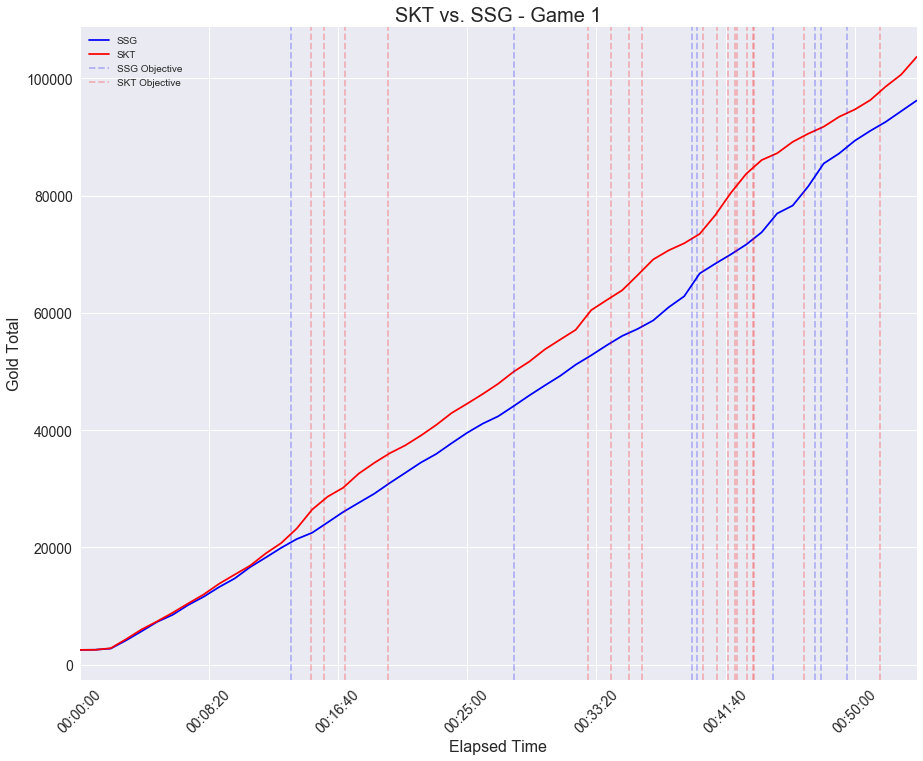

In [402]:
# create plot
styles1 = ['b','r']
game1.plot(style=styles1,figsize=(15,12))

# add objective vlines
ssg1 = pd.read_csv('ssg1.csv',index_col=0)
ssg1 = sum(ssg1.values.tolist(),[])
skt1 = pd.read_csv('skt1.csv',index_col=0)
skt1 = sum(skt1.values.tolist(),[])
i = 0
for xs in ssg1:
    if i == 0:
        plt.axvline(x=xs, color='b', linestyle='--',alpha=0.25, label='SSG Objective')
        i+=1
    else:
        plt.axvline(x=xs, color='b', linestyle='--',alpha=0.25)
i = 0
for xs in skt1:  
    if i == 0:
        plt.axvline(x=xs, color='r', linestyle='--',alpha=0.25, label='SKT Objective')
        i+=1
    else:
        plt.axvline(x=xs, color='r', linestyle='--',alpha=0.25)

# format plot
plt.legend()
plt.title("SKT vs. SSG - Game 1",fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Elapsed Time", fontsize=16)
plt.ylabel("Gold Total", fontsize=16);

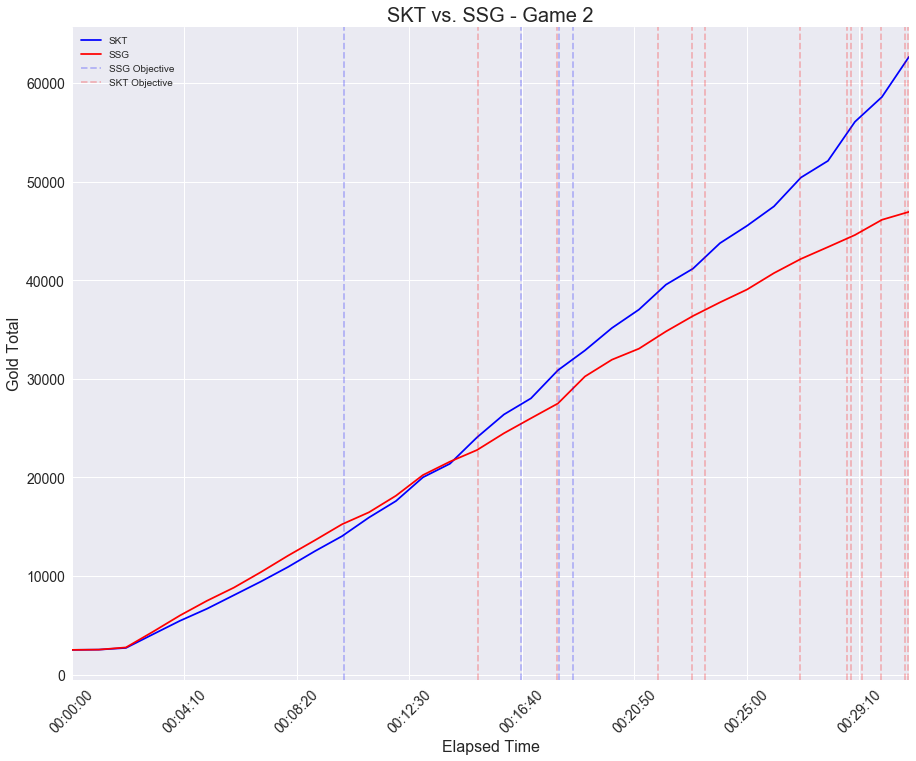

In [422]:
# create plot
styles1 = ['b','r']
game2.plot(style=styles1,figsize=(15,12))

# add objective vlines
ssg2 = pd.read_csv('ssg2.csv',index_col=0)
ssg2 = sum(ssg2.values.tolist(),[])
skt2 = pd.read_csv('skt2.csv',index_col=0)
skt2 = sum(skt2.values.tolist(),[])
i = 0
for xs in ssg2:
    if i == 0:
        plt.axvline(x=xs, color='b', linestyle='--',alpha=0.25, label='SSG Objective')
        i+=1
    else:
        plt.axvline(x=xs, color='b', linestyle='--',alpha=0.25)
i = 0
for xs in skt2:  
    if i == 0:
        plt.axvline(x=xs, color='r', linestyle='--',alpha=0.25, label='SKT Objective')
        i+=1
    else:
        plt.axvline(x=xs, color='r', linestyle='--',alpha=0.25)

# format plot
plt.legend()
plt.title("SKT vs. SSG - Game 2",fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Elapsed Time", fontsize=16)
plt.ylabel("Gold Total", fontsize=16);

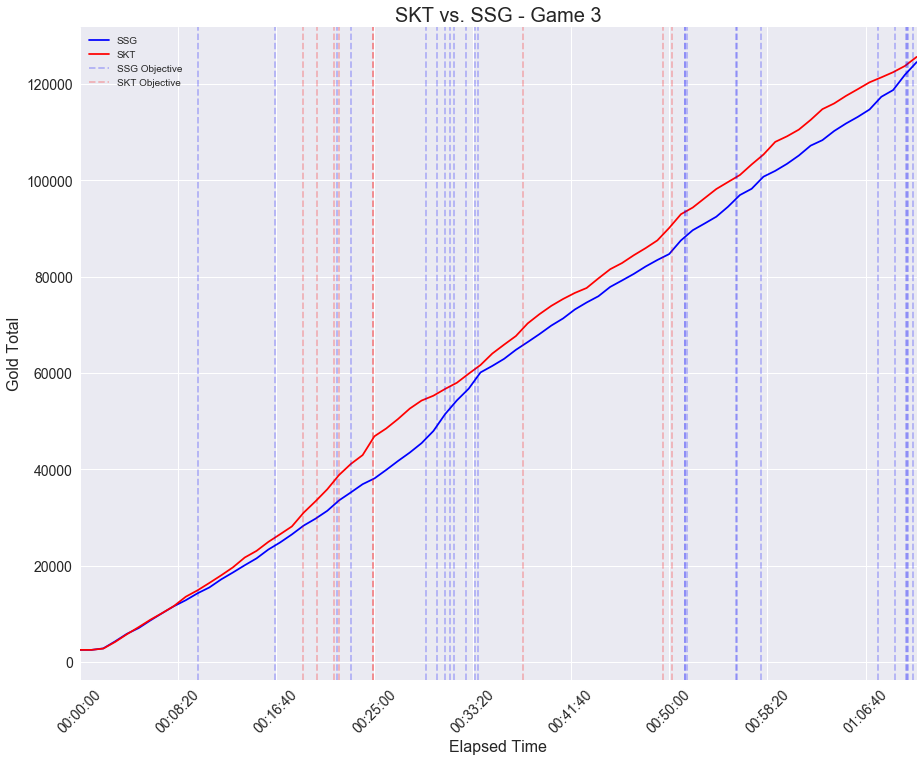

In [404]:
# create plot
styles1 = ['b','r']
game3.plot(style=styles1,figsize=(15,12))

# add objective vlines
ssg3 = pd.read_csv('ssg3.csv',index_col=0)
ssg3 = sum(ssg3.values.tolist(),[])
skt3 = pd.read_csv('skt3.csv',index_col=0)
skt3 = sum(skt3.values.tolist(),[])
i = 0
for xs in ssg3:
    if i == 0:
        plt.axvline(x=xs, color='b', linestyle='--',alpha=0.25, label='SSG Objective')
        i+=1
    else:
        plt.axvline(x=xs, color='b', linestyle='--',alpha=0.25)
i = 0
for xs in skt3:  
    if i == 0:
        plt.axvline(x=xs, color='r', linestyle='--',alpha=0.25, label='SKT Objective')
        i+=1
    else:
        plt.axvline(x=xs, color='r', linestyle='--',alpha=0.25)

# format plot
plt.legend()
plt.title("SKT vs. SSG - Game 3",fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Elapsed Time", fontsize=16)
plt.ylabel("Gold Total", fontsize=16);

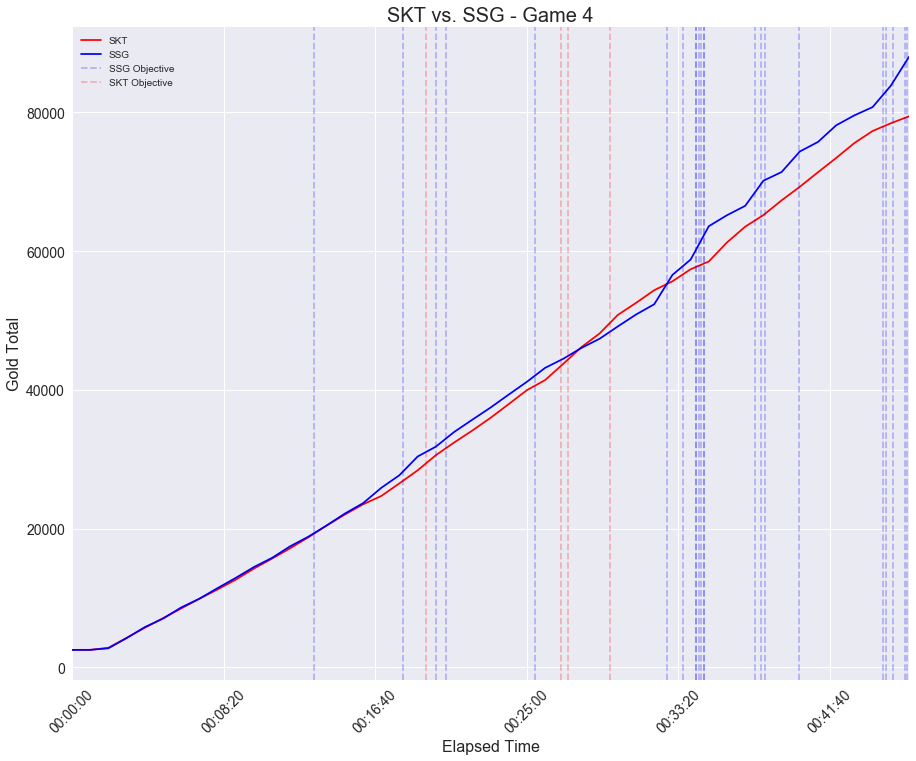

In [393]:
# create plot
styles1 = ['r', 'b']
game4.plot(style=styles1,figsize=(15,12))

# add objective vlines
ssg4 = pd.read_csv('ssg4.csv',index_col=0)
ssg4 = sum(ssg4.values.tolist(),[])
skt4 = pd.read_csv('skt4.csv',index_col=0)
skt4 = sum(skt4.values.tolist(),[])
i = 0
for xs in ssg4:
    if i == 0:
        plt.axvline(x=xs, color='b', linestyle='--',alpha=0.25, label='SSG Objective')
        i+=1
    else:
        plt.axvline(x=xs, color='b', linestyle='--',alpha=0.25)
i = 0
for xs in skt4:  
    if i == 0:
        plt.axvline(x=xs, color='r', linestyle='--',alpha=0.25, label='SKT Objective')
        i+=1
    else:
        plt.axvline(x=xs, color='r', linestyle='--',alpha=0.25)

# format plot
plt.legend()
plt.title("SKT vs. SSG - Game 4",fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Elapsed Time", fontsize=16)
plt.ylabel("Gold Total", fontsize=16);

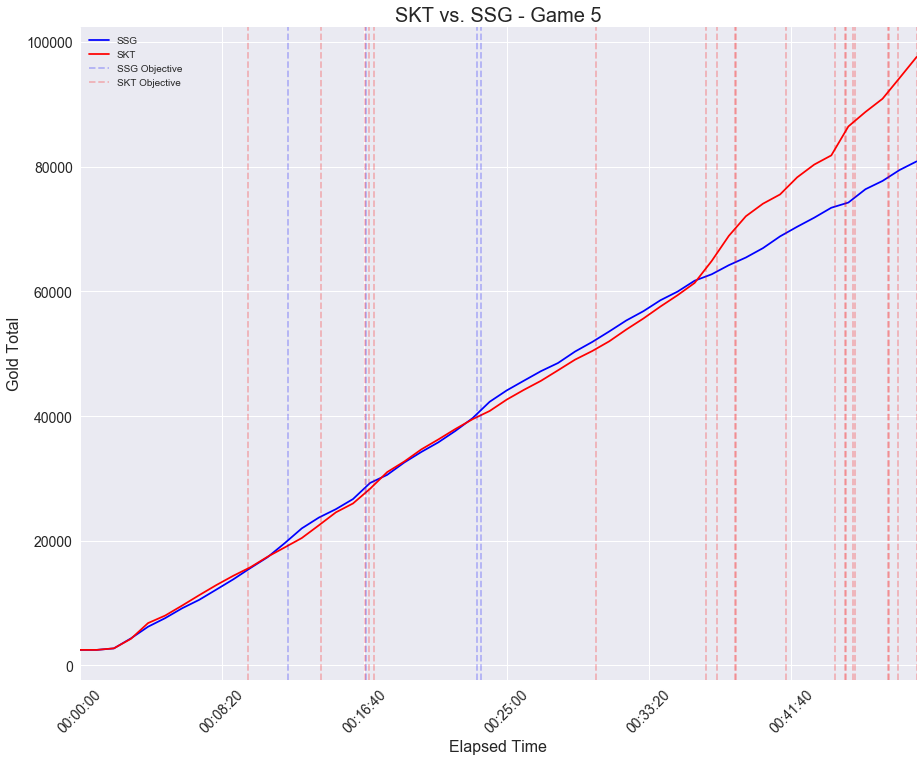

In [403]:
# create plot
styles1 = ['b','r']
game5.plot(style=styles1,figsize=(15,12))

# add objective vlines
ssg5 = pd.read_csv('ssg5.csv',index_col=0)
ssg5 = sum(ssg5.values.tolist(),[])
skt5 = pd.read_csv('skt5.csv',index_col=0)
skt5 = sum(skt5.values.tolist(),[])
i = 0
for xs in ssg5:
    if i == 0:
        plt.axvline(x=xs, color='b', linestyle='--',alpha=0.25, label='SSG Objective')
        i+=1
    else:
        plt.axvline(x=xs, color='b', linestyle='--',alpha=0.25)
i = 0
for xs in skt5:  
    if i == 0:
        plt.axvline(x=xs, color='r', linestyle='--',alpha=0.25, label='SKT Objective')
        i+=1
    else:
        plt.axvline(x=xs, color='r', linestyle='--',alpha=0.25)

# format plot
plt.legend()
plt.title("SKT vs. SSG - Game 5",fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Elapsed Time", fontsize=16)
plt.ylabel("Gold Total", fontsize=16);

In [424]:
gm_df.head()

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
0,001a1f289e3bab22,LCK,Summer_Season,2015,ANC,blue,0,38,total_gold,NaN,NaN,0,15,46,-133,-60,-904,-505,-852,-763,-1224,-998,-133,-1337,-1246,-1185,-1201,-1601,-3824,-4471,-4017,-2044,-2690,-2997,-1582,-1827,-1672,-1895,-2741,-3087,-2756,-3615,-3957,-4035,-3850,-4045,-4100,-8951,-8953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,001a1f289e3bab22,LCK,Summer_Season,2015,CJE,red,1,38,total_gold,NaN,NaN,0,-15,-46,133,60,904,505,852,763,1224,998,133,1337,1246,1185,1201,1601,3824,4471,4017,2044,2690,2997,1582,1827,1672,1895,2741,3087,2756,3615,3957,4035,3850,4045,4100,8951,8953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,001f50c8547e2e73,Season_World_Championship,International,2014,EDG,blue,1,37,total_gold,NaN,NaN,0,0,0,89,-92,-174,191,69,253,362,76,1964,2364,3302,2745,3678,2492,3066,4765,7023,7136,7480,9872,9976,9944,11088,11137,11410,11434,11909,11660,12350,15929,17225,16526,18484,21780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,001f50c8547e2e73,Season_World_Championship,International,2014,AHQ,red,0,37,total_gold,NaN,NaN,0,0,0,-89,92,174,-191,-69,-253,-362,-76,-1964,-2364,-3302,-2745,-3678,-2492,-3066,-4765,-7023,-7136,-7480,-9872,-9976,-9944,-11088,-11137,-11410,-11434,-11909,-11660,-12350,-15929,-17225,-16526,-18484,-21780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,002f613ae09ad421,LMS,Spring_Season,2016,TPA,blue,1,30,total_gold,NaN,NaN,0,0,17,-106,-136,400,363,829,1532,1862,1473,1514,2290,2793,2975,3497,5391,5188,6938,8541,9835,10428,11160,11492,12184,14247,14372,14594,16182,16344,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [426]:
# select only the games from 2016 World Championships
champ_df = gm_df.loc[(gm_df['league'] == 'Season_World_Championship') &
                      (gm_df['year'] == 2016) & (gm_df['type'] == 'total_gold'),:]

# the finals were played by SKT and SSG
finals_df = champ_df.loc[(champ_df['team_name'] == 'SSG') | (champ_df['team_name'] == 'SKT'),:]

In [427]:
# select only the 5 games from the finals
fin_df = finals_df.loc[(finals_df['match_id'] == '473fc1deff74591b') |
                      (finals_df['match_id'] == '2a1d6285ce9dd71f') |
                      (finals_df['match_id'] == '6ca759012b24b8b1') |
                      (finals_df['match_id'] == 'ac33fc72f78724a8') |
                      (finals_df['match_id'] == 'e5af5592e36bdb01'),:]
fin_df

,match_id,league,season,year,team_name,red_or_blue_side,result,game_length,type,player_name,champion,min_0,min_1,min_2,min_3,min_4,min_5,min_6,min_7,min_8,min_9,min_10,min_11,min_12,min_13,min_14,min_15,min_16,min_17,min_18,min_19,min_20,min_21,min_22,min_23,min_24,min_25,min_26,min_27,min_28,min_29,min_30,min_31,min_32,min_33,min_34,min_35,min_36,min_37,min_38,min_39,min_40,min_41,min_42,min_43,min_44,min_45,min_46,min_47,min_48,min_49,min_50,min_51,min_52,min_53,min_54,min_55,min_56,min_57,min_58,min_59,min_60,min_61,min_62,min_63,min_64,min_65,min_66,min_67,min_68,min_69,min_70,min_71,min_72,min_73,min_74,min_75,min_76,min_77,min_78,min_79,min_80
1222,2a1d6285ce9dd71f,Season_World_Championship,International,2016,SKT,blue,0,47,total_gold,NaN,NaN,0,-8,67,45,-95,66,-144,-9,-192,-263,-225,-103,-286,-89,-20,-136,-166,-1177,-1176,-1991,-1232,-1516,-1565,-1483,-1375,-1201,-1762,-729,113,763,1658,1679,2028,-921,-1394,-5087,-3925,-3005,-4955,-4087,-5086,-4368,-4704,-3994,-3445,-5404,-8573,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1223,2a1d6285ce9dd71f,Season_World_Championship,International,2016,SSG,red,1,47,total_gold,NaN,NaN,0,8,-67,-45,95,-66,144,9,192,263,225,103,286,89,20,136,166,1177,1176,1991,1232,1516,1565,1483,1375,1201,1762,729,-113,-763,-1658,-1679,-2028,921,1394,5087,3925,3005,4955,4087,5086,4368,4704,3994,3445,5404,8573,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2076,473fc1deff74591b,Season_World_Championship,International,2016,SKT,blue,1,32,total_gold,NaN,NaN,0,0,-50,-259,-539,-808,-769,-959,-1148,-1105,-1205,-529,-539,-229,-211,1283,1905,2020,3368,2641,3214,3965,4747,4801,6003,6463,6766,8252,8739,11484,12458,15718,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2077,473fc1deff74591b,Season_World_Championship,International,2016,SSG,red,0,32,total_gold,NaN,NaN,0,0,50,259,539,808,769,959,1148,1105,1205,529,539,229,211,-1283,-1905,-2020,-3368,-2641,-3214,-3965,-4747,-4801,-6003,-6463,-6766,-8252,-8739,-11484,-12458,-15718,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3204,6ca759012b24b8b1,Season_World_Championship,International,2016,SSG,blue,1,72,total_gold,NaN,NaN,0,0,34,120,89,-199,-145,-19,-40,-725,-617,-932,-838,-1067,-1604,-1555,-1587,-1701,-1660,-2683,-3607,-4467,-5271,-5912,-6039,-8752,-8603,-8711,-9128,-8841,-7331,-5222,-3655,-3110,-1537,-2568,-2947,-2863,-3876,-4137,-4093,-4042,-3434,-3011,-3704,-3677,-3616,-3876,-3816,-4064,-5415,-5437,-4708,-5248,-5748,-5121,-4160,-5051,-4596,-6016,-5711,-5378,-5336,-6434,-5721,-5734,-5752,-5643,-4030,-3707,-1834,-1082,0,0,0,0,0,0,0,0,0
3205,6ca759012b24b8b1,Season_World_Championship,International,2016,SKT,red,0,72,total_gold,NaN,NaN,0,0,-34,-120,-89,199,145,19,40,725,617,932,838,1067,1604,1555,1587,1701,1660,2683,3607,4467,5271,5912,6039,8752,8603,8711,9128,8841,7331,5222,3655,3110,1537,2568,2947,2863,3876,4137,4093,4042,3434,3011,3704,3677,3616,3876,3816,4064,5415,5437,4708,5248,5748,5121,4160,5051,4596,6016,5711,5378,5336,6434,5721,5734,5752,5643,4030,3707,1834,1082,0,0,0,0,0,0,0,0,0
5090,ac33fc72f78724a8,Season_World_Championship,International,2016,SSG,blue,0,50,total_gold,NaN,NaN,0,0,-11,67,-584,-411,-434,-747,-723,-568,-127,-75,682,1546,1241,508,706,927,-443,-155,-411,-463,-306,170,1477,1473,1468,1552,1170,1299,1454,1582,1454,1173,1008,578,355,-2137,-4697,-6621,-7127,-6724,-7925,-8517,-8395,-12205,-12393,-13179,-14763,-16756,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5091,ac33fc72f78724a8,Season_World_Championship,International,2016,SKT,red,1,50,total_gold,NaN,NaN,0,0,11,-67,584,411,434,747,723,568,127,75,-682,-1546,-1241,-508,-706,-927,443,155,411,463,306,-170,-1477,-1473,-1468,-1552,-1170,-1299,-1454,-1582,-1454,-1173,-1008,-578,-355,2137,4697,6621,7127,6724,7925,8517,8395,12205,12393,13179,14763,16756,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6814,e5af5592e36bdb01,Season_World_Cha

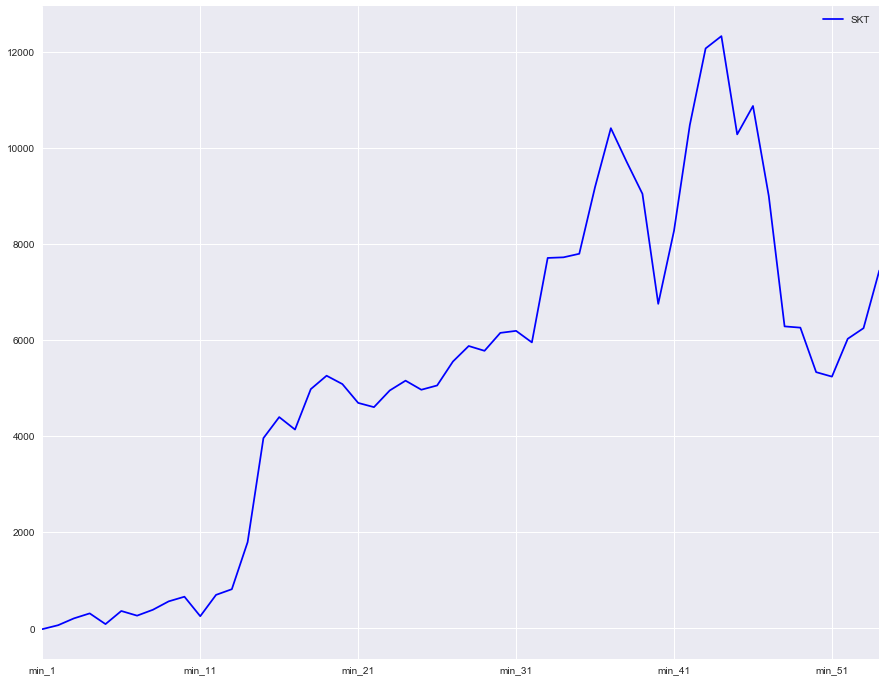

In [434]:
# prepare data for graphing
game1 = fin_df.loc[(fin_df['match_id'] == 'e5af5592e36bdb01'),:]
game1 = game1.drop(['match_id', 'league', 'season', 'year', 'red_or_blue_side', 'result', 'game_length', 'type', 
            'player_name', 'champion'], axis=1)
game1 = game1.fillna(0)

# transpose data and rename columns 
game1 = game1.drop('team_name', axis=1)
game1 = game1.T
game1 = game1.rename(columns = {6814:'SSG',6815:'SKT'})

# only select rows where the game is being played
# after the game ends the values are NaN (0)
game1.drop('SSG', axis=1, inplace=True)
game1 = game1.loc[(game1['SKT'] != 0),:]

game1.plot(style=styles1,figsize=(15,12));